<a href="https://colab.research.google.com/github/ad17171717/YouTube-Tutorials/blob/main/Python/Creating%20an%20Interactive%20Map/Python!_Creating_an_Interactive_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import geocoder
import pandas as pd
import folium

# **Creating an Interactive Map**

**In this tutorial we will review how to create an interactive map with Python. Within the tutorial we will use the following packages: `time`, `geocoder`, `pandas` and `folium`.**

## **Retrieving the Longitude and Latitude for a Location**

**The list below contains the names of National Parks across Asia. In order to plot the data, we need to retrieve the Longitude and Latitude for all of the parks.**

**Geographic coordinate systems use latitude and longitude values to describe point locations on earth. Latitude and longitude are angle measurements from the earth's center to locations on the surface. Latitude defines location on the planet in terms of north or south. Longitude defines a position on the planet in terms of east or west.**

**For the `geocoder` module, the values for Latitude range from -90 (South Pole) to 90 (North Pole). The Prime Meridian is the line of longitude that is defined as 0° longitude. The longitude ranges from -180 (West of the Prime Meridian) to 180 (East of the Prime Meridian).**

<sup>Source: [Introduction to Latitude and Longitude](https://www.tamiu.edu/cees/courses/epsc1170_labs/Lab01_LatLong.pdf) from Texas A&M International University</sup>

<sup>Source: [Geographic Coordinate Systems](https://www.usu.edu/geospatial/tutorials/core-concepts/geographic-coordinate-systems) from Utah State University</sup>

In [2]:
#list of national parks
national_park_list = ["Goreme Historical National Park","Bandhavgarh National Park","北京长城国家公园","Bukhansan National Park","Caesarea National Park",
                      "Cat Ba National Park","Chitwan National Park","Erawan National Park","Fuji-Hakone-Izu National Park","Giant Panda National Park",
                      "广西桂林国家森林公园","黄山国家森林公园","玉龙雪山国家级风景名胜区","Jiuzhaigou National Park","Khao Sok National Park",
                      "Komodo National Park","Masada National Park","日光国立公園","Puerto Princesa Subterranean River","Ranthambhore National Park",
                      "Sagarmatha National Park","Seoraksan National Park","Shiretoko National Park","Yala National Park","张家界国家森林公园","张掖国家地质公园",
                      "Bandipur National Park","Bardiya National Park",    "Ein Hemed National Park","Gan Hashlosha National Park","Gir National Park",
                      "Gobi Gurvansaikhan National Park","Gorkhi-Terelj National Park","한라산 국립공원","Hundred Islands National Park","Jigme Dorji National Park",
                      "Jim Corbett National Park","Jirisan National Park","Kaziranga National Park","Khangchendzonga National Park","MacArthur Landing Memorial National Park",
                      "Naejangsan National Park","Nagarhole National Park","Penang National Park","Pench National Park","Phnom Kulen National Park",
                      "Royal Manas National Park","Songnisan National Park","Sunderbans National Park","Tadoba Andhari National Park","Taroko National Park","Yangmingshan National Park"]

<sup>Source: [National Parks in Asia](https://national-parks.org/asia) from national-parks.org</sup>

In [3]:
#store the national park data in a dictionary
national_park_dict = {'Park':[],'Latitude':[],'Longitude':[]}
not_found = []

#use geocoder to retrieve the longitude and latitude for a given park
for park in national_park_list:
  time.sleep(1)
  location = geocoder.osm(park)

  if location:
    national_park_dict['Park'].append(park)
    national_park_dict['Latitude'].append(location.latlng[0])
    national_park_dict['Longitude'].append(location.latlng[1])
  else:
    not_found.append(park)

In [4]:
print(f'{len(national_park_dict["Park"])} locations were found and {len(not_found)} were not found.')

52 locations were found and 0 were not found.


## **Save the Data to a pandas DataFrame**

In [5]:
df = pd.DataFrame(national_park_dict)
df

,Park,Latitude,Longitude
0,Goreme Historical National Park,38.649977,34.854545
1,Bandhavgarh National Park,23.644413,81.024502
2,北京长城国家公园,30.697995,114.265156
3,Bukhansan National Park,37.667593,126.981439
4,Caesarea National Park,32.501433,34.892823
5,Cat Ba National Park,20.799919,107.043906
6,Chitwan National Park,27.516821,84.438294
7,Erawan National Park,14.348638,99.069726
8,Fuji-Hakone-Izu National Park,35.404097,138.656508
9,Giant Panda National Park,33.791291,107.702520


## **Create a Map**

**Using `folium` we can map all of the parks. There are a variety of styles that can be used to create the map. To view more styles check the link to Leaflet in the References and Additional learning section below. A custom icon can be used to mark the locations.**


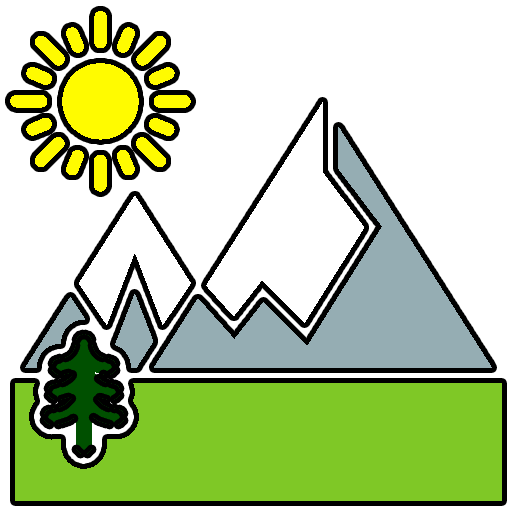
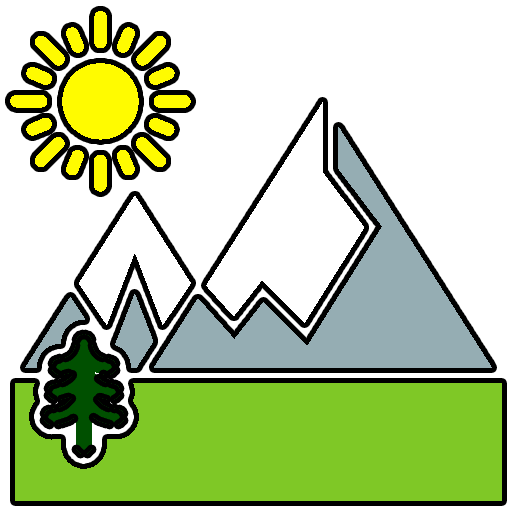
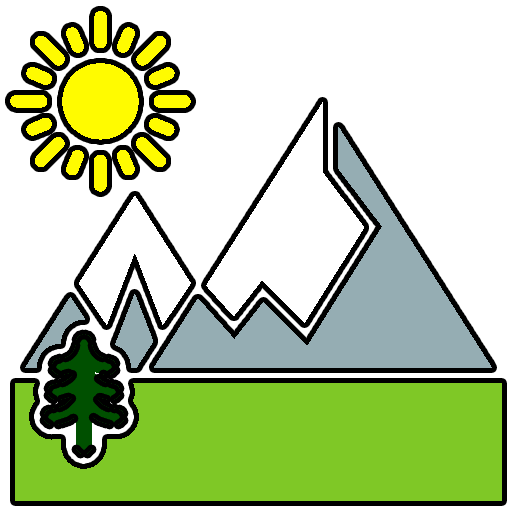
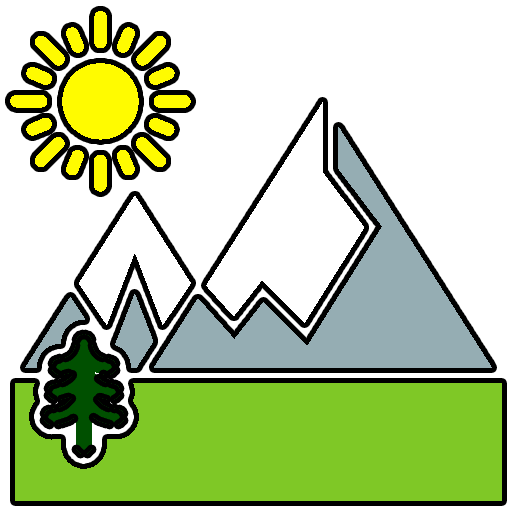
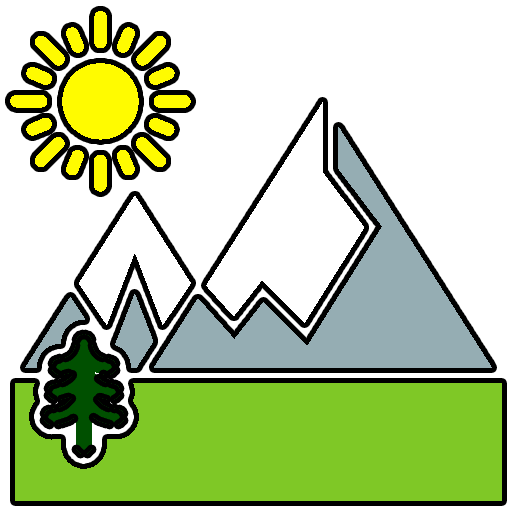
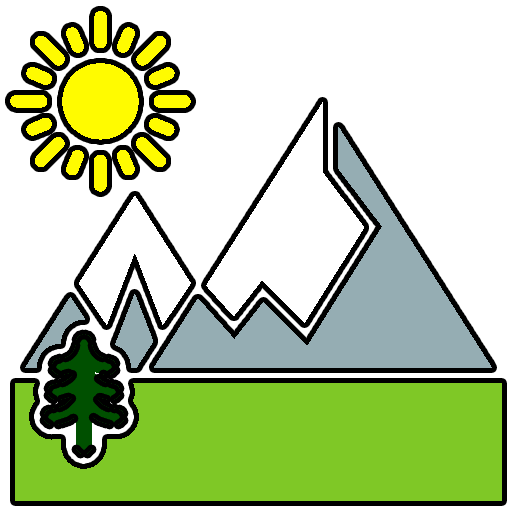
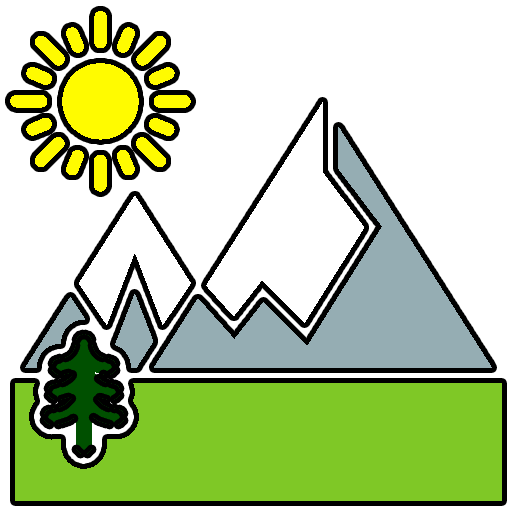
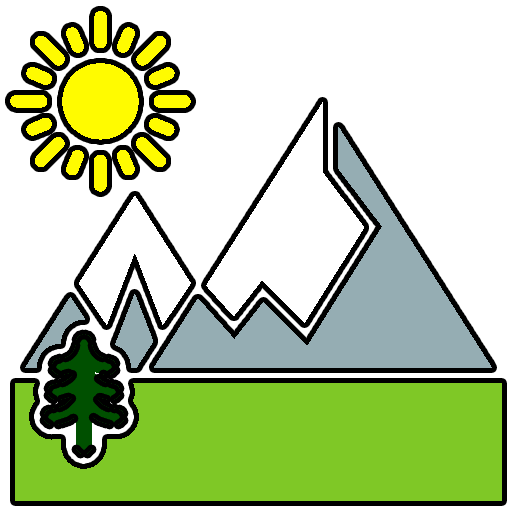
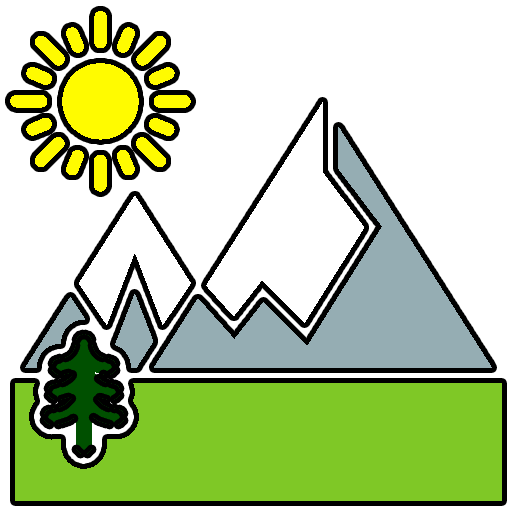
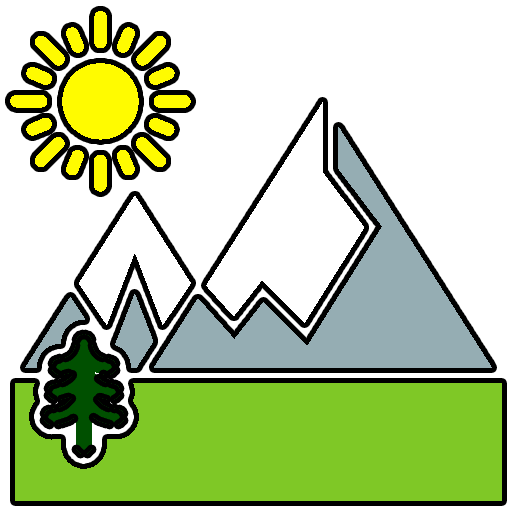
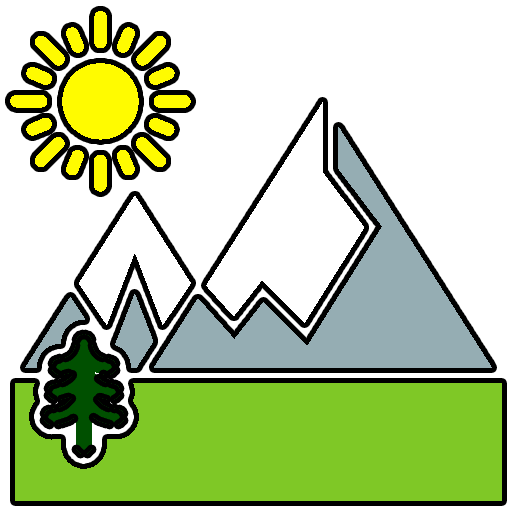
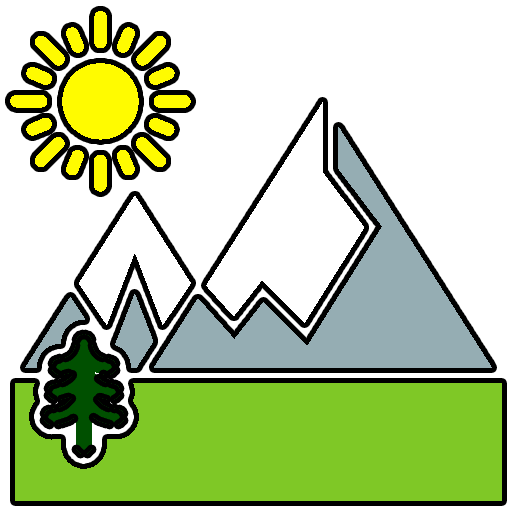
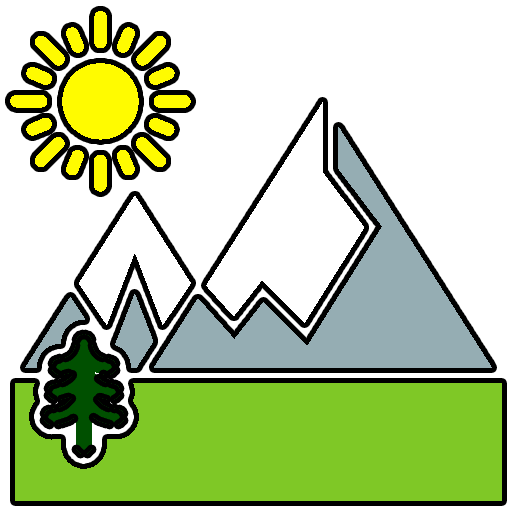
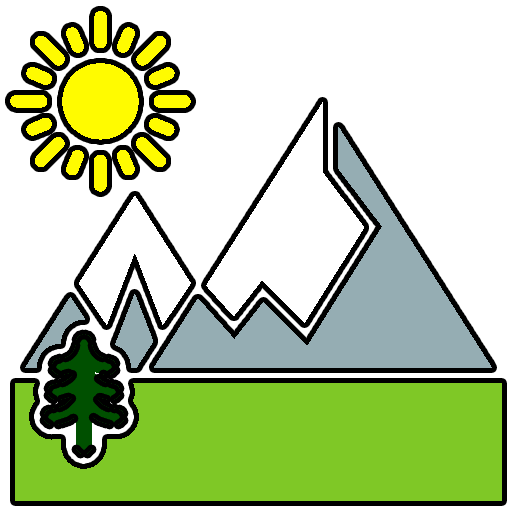
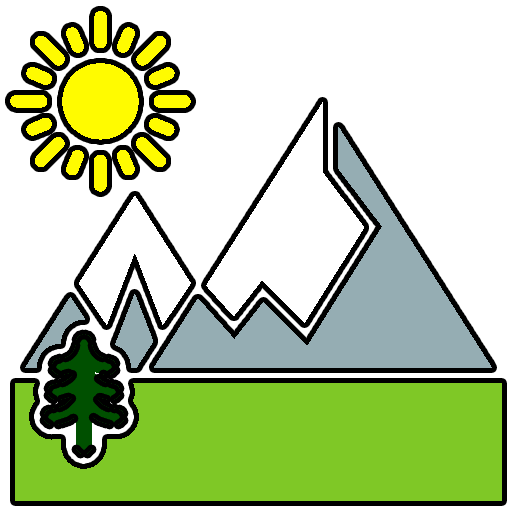
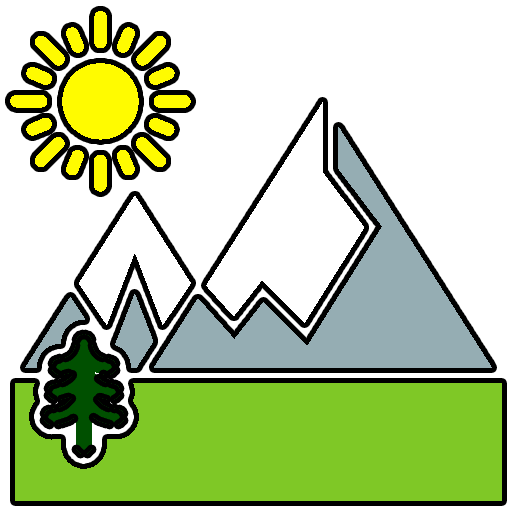
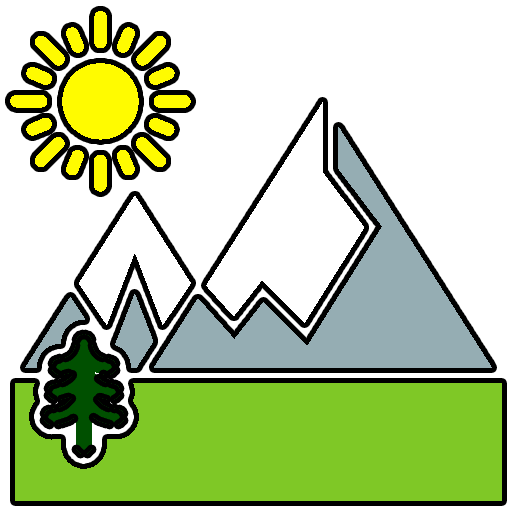
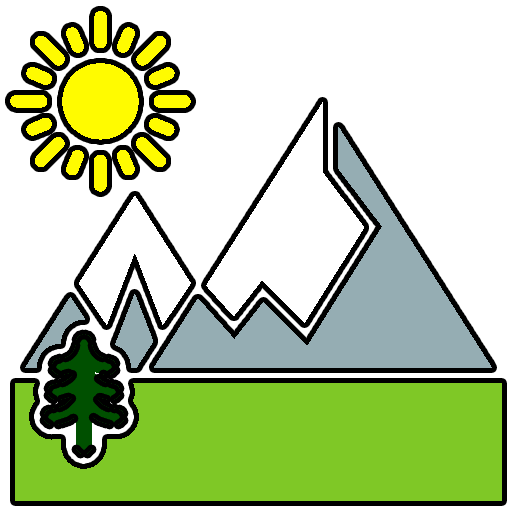
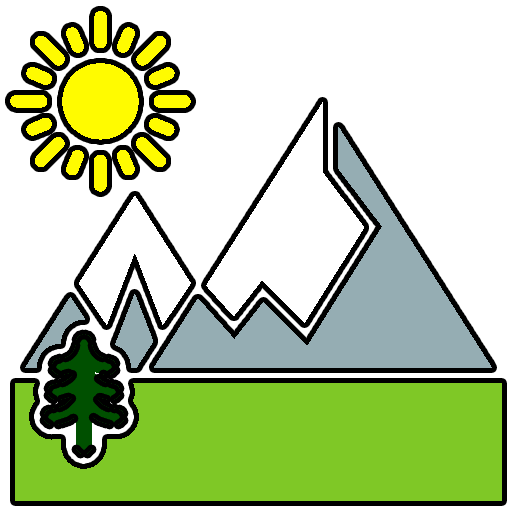
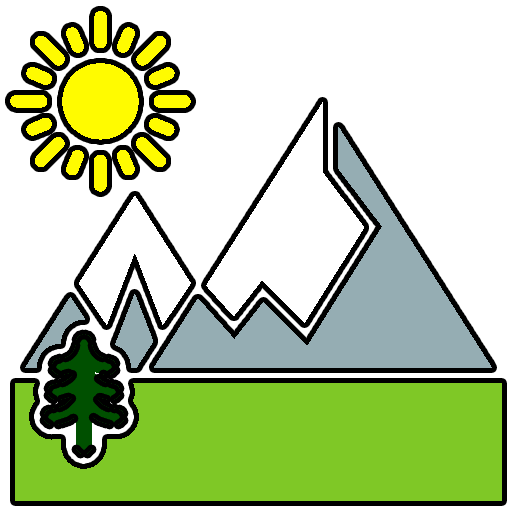
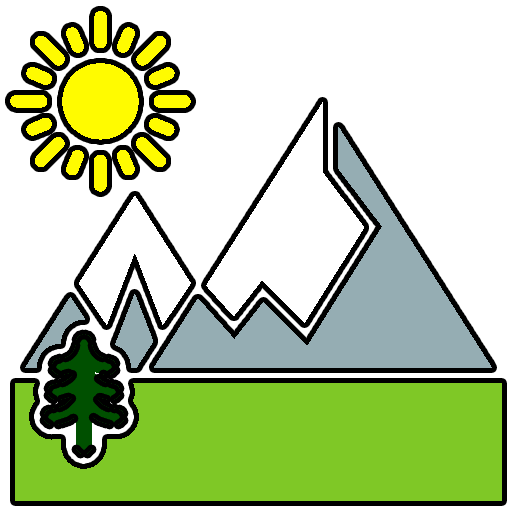
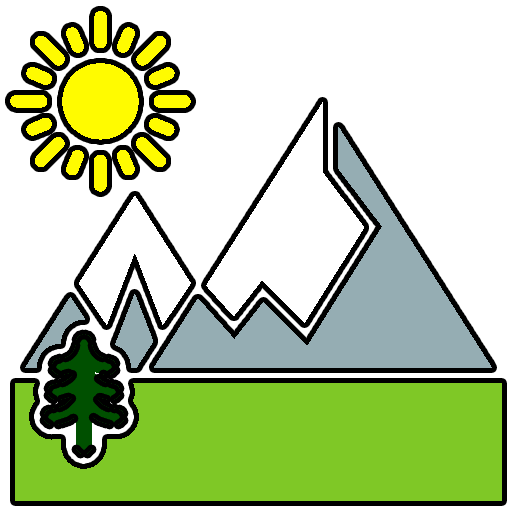
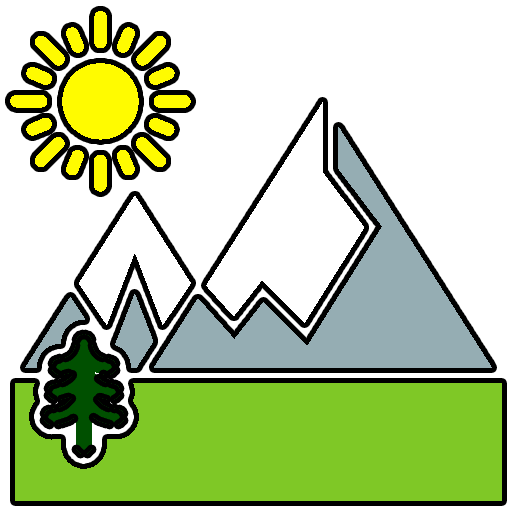
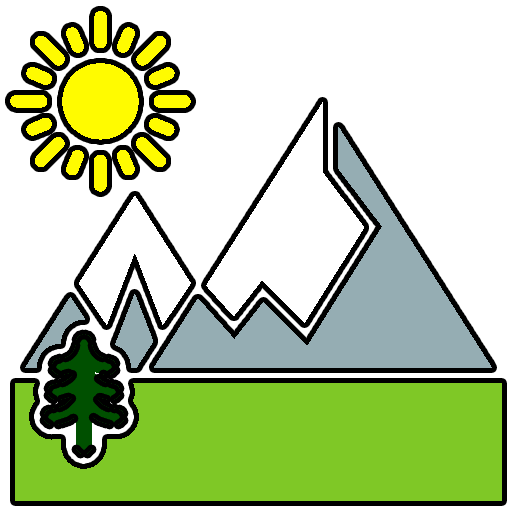
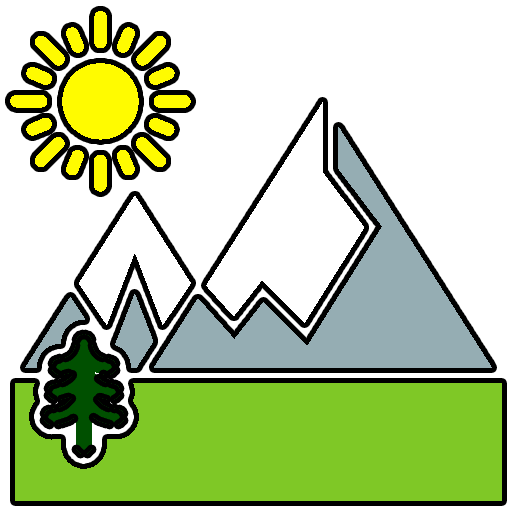
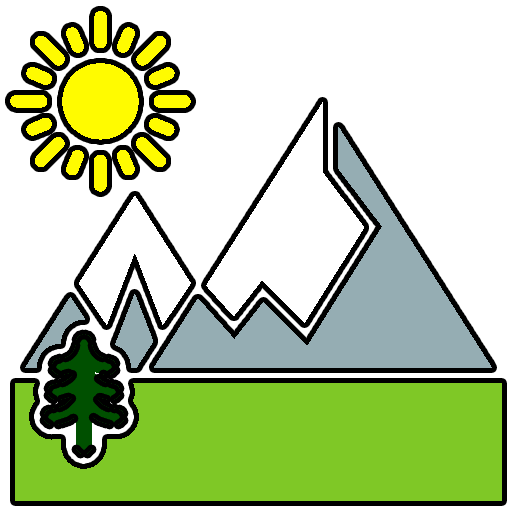
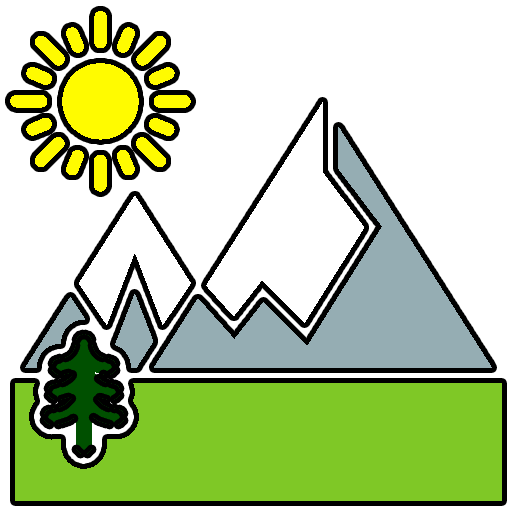
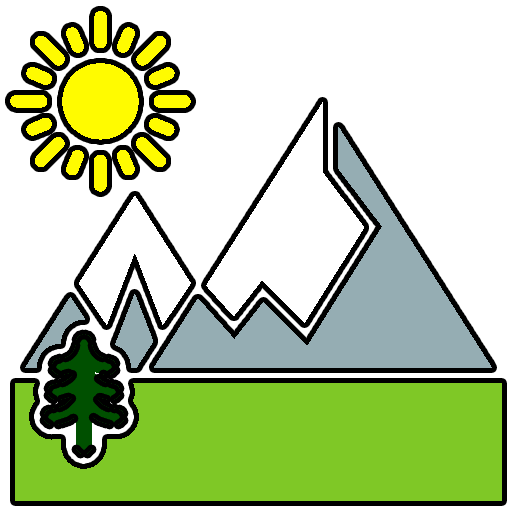
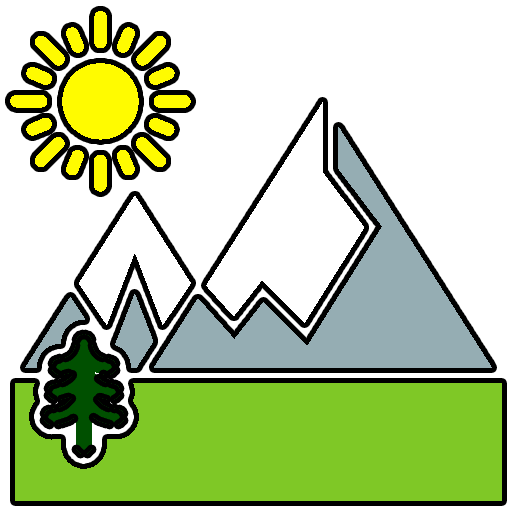
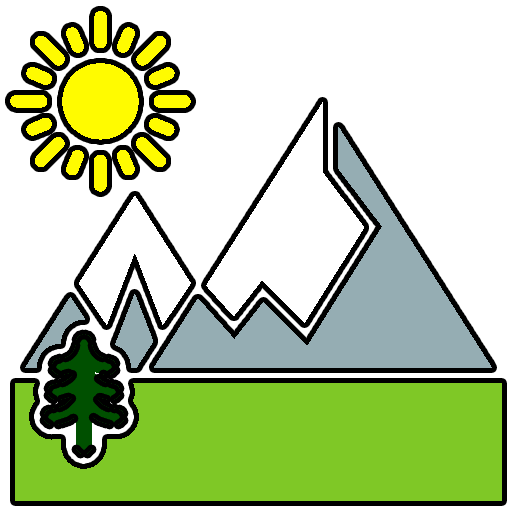
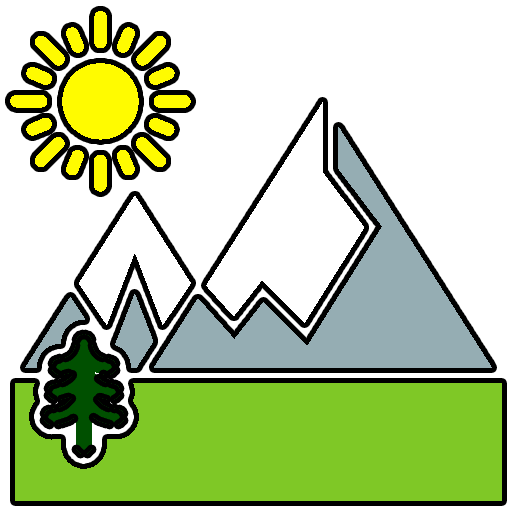
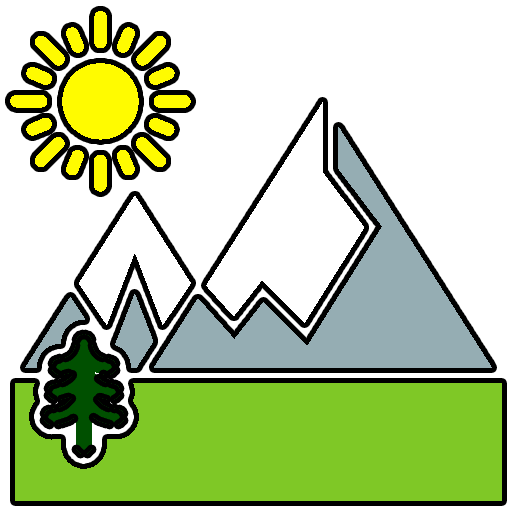
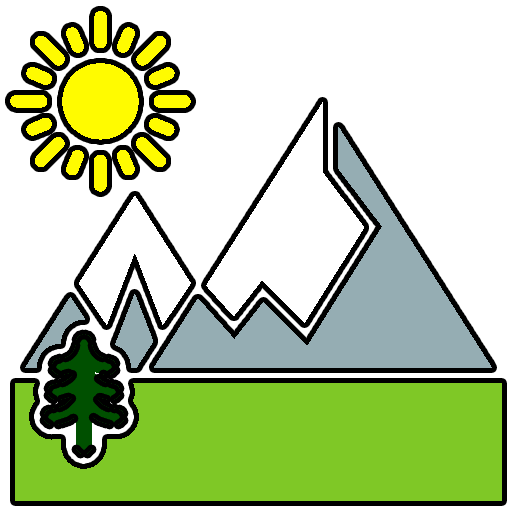
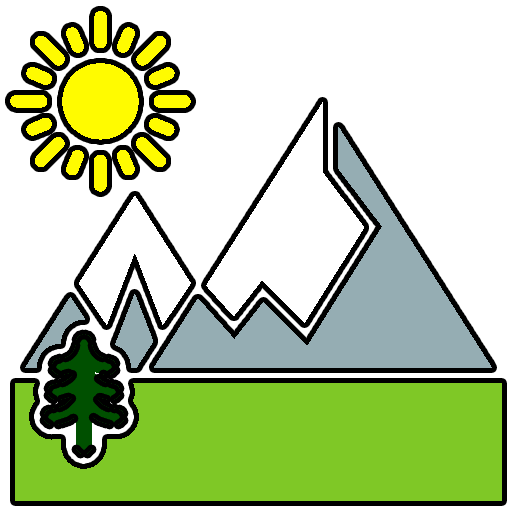
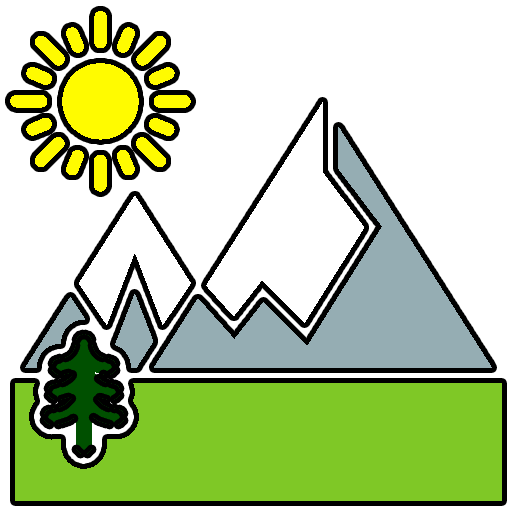
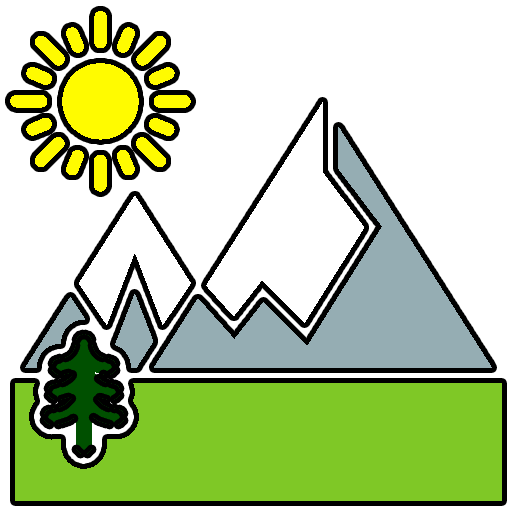
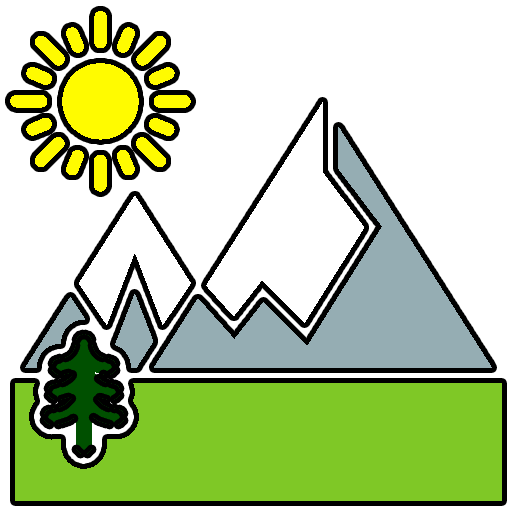
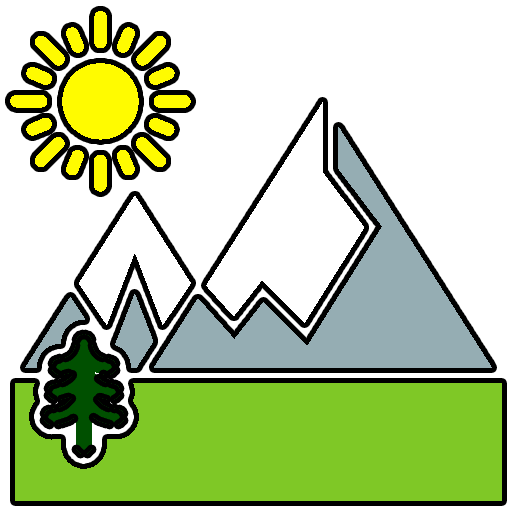
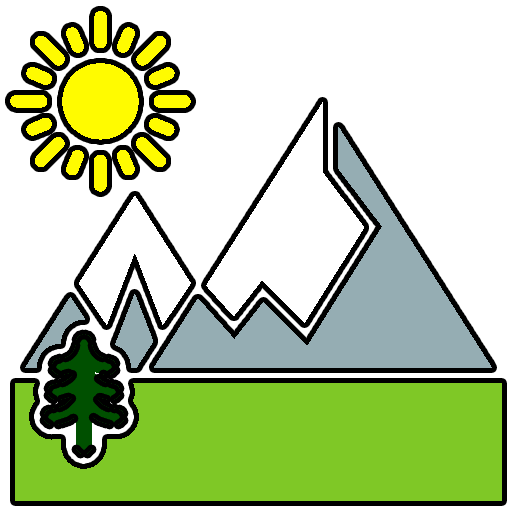
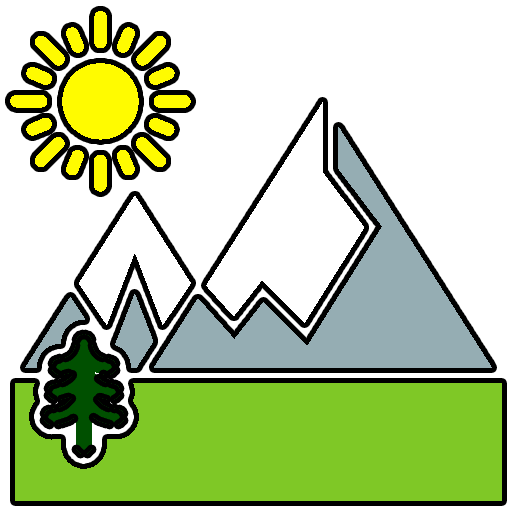
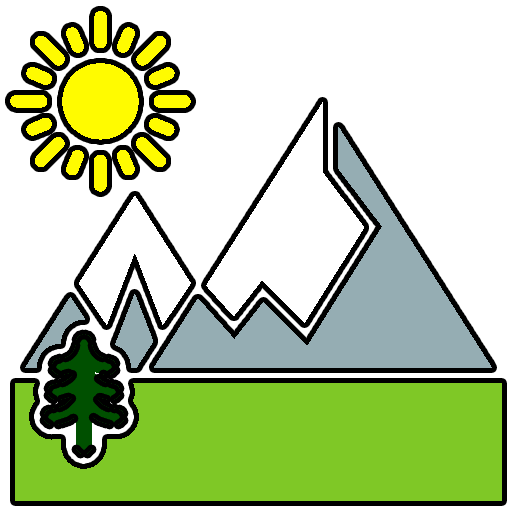
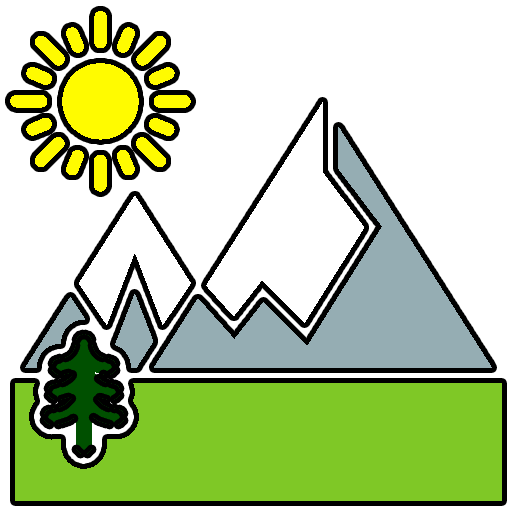
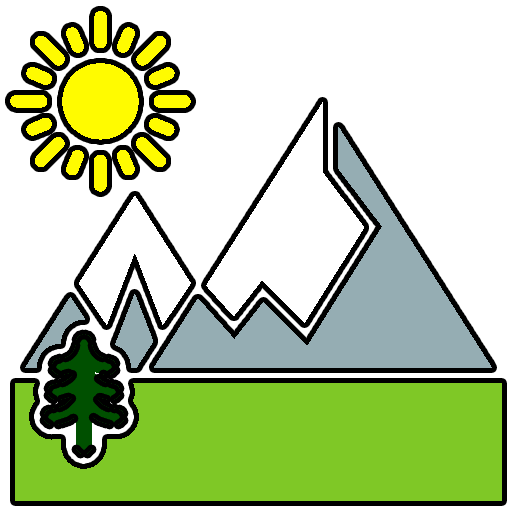
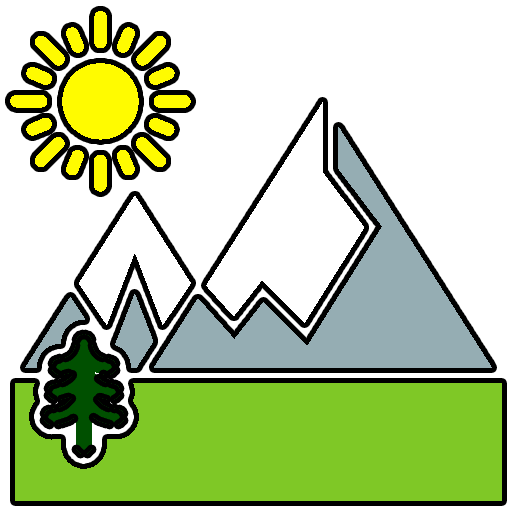
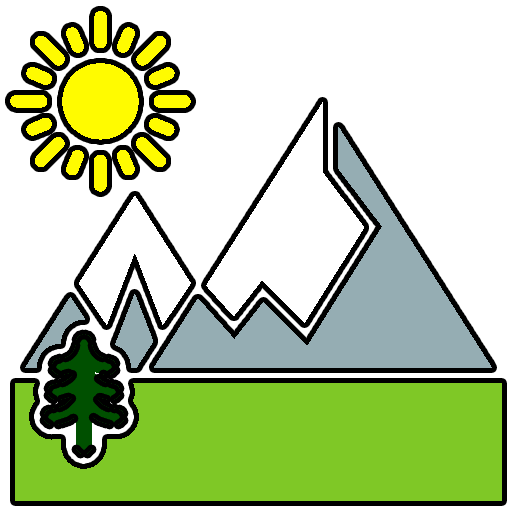
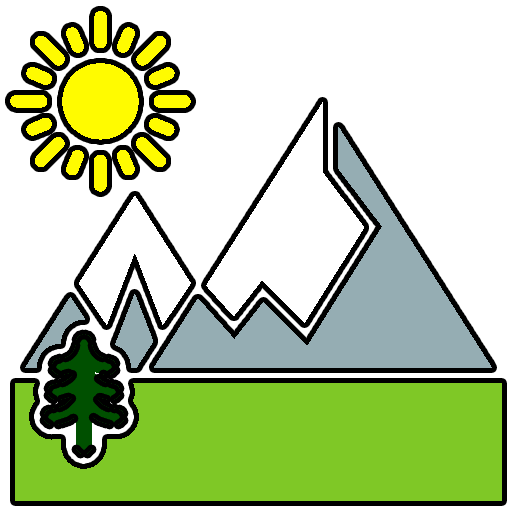
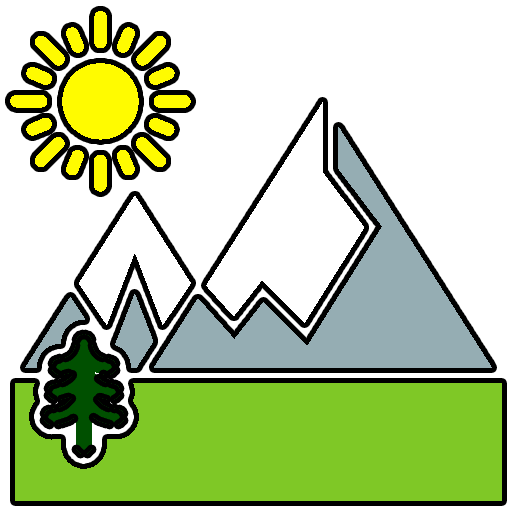
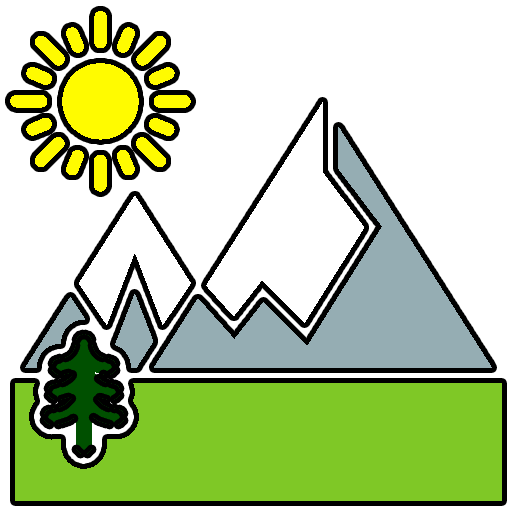
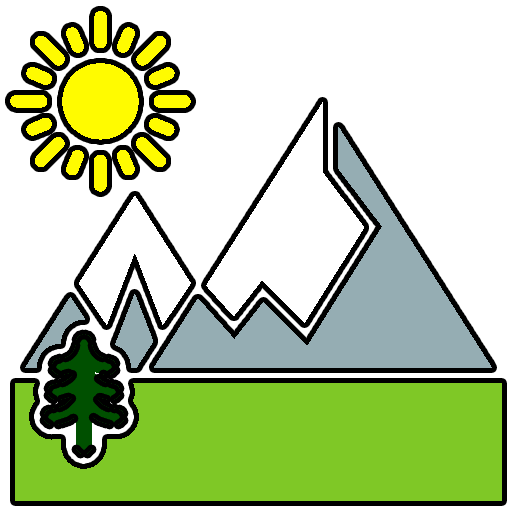
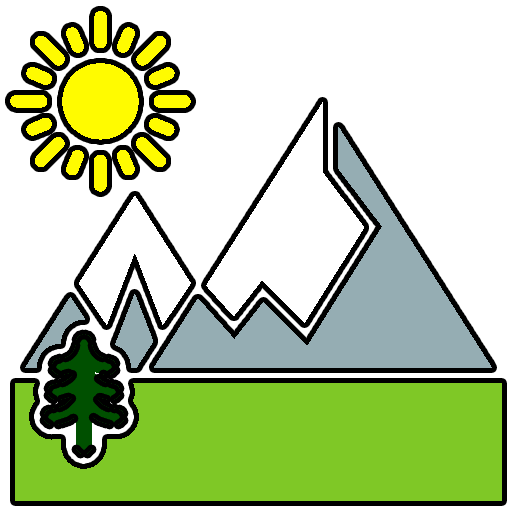
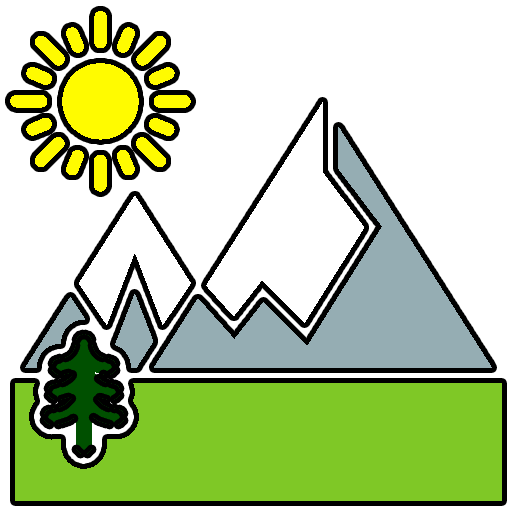
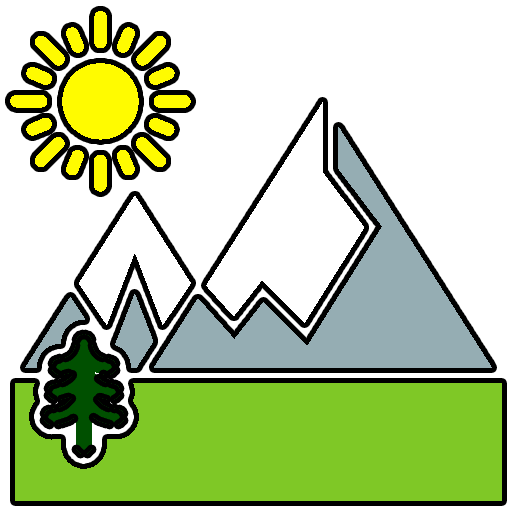

In [6]:
#create map centered on average latitude and longitude
m = folium.Map(
    location=[df['Latitude'].mean(), df['Longitude'].mean()],
    zoom_start=6,
    #set map style
    tiles='Esri.WorldTopoMap',
)

icon_path = "/content/park_icon.png"

#add markers with custom icons
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Park'],
        icon=folium.CustomIcon(icon_path, icon_size=(30, 30)),
    ).add_to(m)

m

# **References and Additional Learning**

## **Data**

- **[Leaflet Tiles for Maps](https://leaflet-extras.github.io/leaflet-providers/preview/) from leaflet-extras.github.io**

- **[National Parks in Asia](https://national-parks.org/asia) from national-parks.org**

## **Documentation**

- **[Folium Documentation](https://python-visualization.github.io/folium/latest/) from python-visualization.github.io**

- **[Geocoder Documentation](https://geocoder.readthedocs.io/#) from geocoder.readthedocs.io**

- **[pandas Documentation](https://pandas.pydata.org/) from pandas.pydata.org**

## **Web**

- **[Geographic Coordinate Systems](https://www.usu.edu/geospatial/tutorials/core-concepts/geographic-coordinate-systems) from Utah State University**

- **[Introduction to Latitude and Longitude](https://www.tamiu.edu/cees/courses/epsc1170_labs/Lab01_LatLong.pdf) from Texas A&M International University**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [X](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717), [Medium](https://adriandolinay.medium.com/) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**

# **Podcast**

- **Check out Adrian's Podcast, The Aspiring STEM Geek on [YouTube](https://www.youtube.com/@AdrianDolinay/podcasts), [Spotify](https://open.spotify.com/show/60dPNJbDPaPw7ru8g5btxV), [Apple Podcasts](https://podcasts.apple.com/us/podcast/the-aspiring-stem-geek/id1765996824), [Audible](https://www.audible.com/podcast/The-Aspiring-STEM-Geek/B0DC73S9SN?eac_link=MCFKvkxuqKYU&ref=web_search_eac_asin_1&eac_selected_type=asin&eac_selected=B0DC73S9SN&qid=IrZ84nGqvz&eac_id=141-8769271-5781515_IrZ84nGqvz&sr=1-1) and [iHeart Radio](https://www.iheart.com/podcast/269-the-aspiring-stem-geek-202676097/)!**